# Síntesis de algunas funciones RLC

<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

## Resumen 
En el siguiente documento se presentan lineamientos para realizar algunas síntesis RLC. Si bien existen métodos sistemáticos para tal fin, en el contexto de la materia Teoría de Circuitos 2, nos interesarán ciertas redes con topologías bien definidas. Para ello enfatizamos la importancia de conocer dicha topología circuital (red no disipativa con doble o simplemente cargada, sin carga, etc.), y utilizarla durante el procedimiento de síntesis como guía para realizar las remociones.

* Funciones de dibujo de redes: [dibujar_puerto_entrada](), [dibujar_funcion_exc_abajo](), [dibujar_elemento_derivacion](), [dibujar_espacio_derivacion](), [dibujar_elemento_serie]()
* Funciones de síntesis de dipolos: [remover_polo_infinito](), [remover_valor_en_infinito]()
* Funciones para presentación de markdown y latex: [print_latex](), [print_subtitle](), [a_equal_b_latex_s]()


## Introducción

Concluye la sección de síntesis de funciones de excitación dejando algunas pautas para resolver la síntesis de redes R-L-C. Como se explicó en los documentos anteriores para las redes compuestas por dos elementos diferentes, habrá que prestar especial atención en todos los pasos de la síntesis de que la inmitancia remanente no pierda su **condición de ser realizable**, es decir que sea FRP. 

Se presentan a continuación algunos ejemplos orientados a resolver ciertos problemas especialmente útiles al momento de sintetizar **transferencias cargadas**. Se remite al lector interesado en métodos sistemáticos a la [bibliografía](https://en.wikipedia.org/wiki/Network_synthesis) (Brune, Bott-Duffin, Miyata, etc.)

Se inicializa el entorno de trabajo para comenzar con el primer ejemplo

In [10]:

import sympy as sp

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_infinito, isFRP
from pytc2.remociones import remover_valor_en_dc, remover_valor_en_infinito, remover_polo_sigma

from pytc2.sintesis_dipolo import cauer_RC, foster, foster_zRC2yRC
from pytc2.dibujar import dibujar_cauer_RC_RL, dibujar_foster_derivacion, dibujar_foster_serie
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown


## Ejemplo 1:

Sea la siguiente función de impedancia:

$$ Z(s) = \frac{(s^2+2s+2)}{(s^2+s+1)} $$ 

Se comienza por la inicialización de variables y la función dada

In [11]:
# Resolución simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
ZZ = (s**2 + 2*s + 2)/(s**2 + 1*s + 1)

print_subtitle('Impedancia $Z_{RLC}$ ')

print_latex(a_equal_b_latex_s('Z_{RLC}(s)', ZZ))


#### Impedancia $Z_{RLC}$ 

<IPython.core.display.Math object>

In [12]:
# Se expande ZRC a la Foster
k0, koo, ki_wi, kk, ZRLC_foster = foster(ZZ)

print_subtitle('Expansión Foster de $Z_{RLC}$ ')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z_{RLC}(s)', ZZ)[1:-1], ZRLC_foster ))

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1', ki_wi ))

print_latex(a_equal_b_latex_s('k_k', kk))



#### Expansión Foster de $Z_{RLC}$ 

<IPython.core.display.Math object>

TypeError: a debe ser un símbolo o una cadena y b debe ser un símbolo.

In [ ]:
# Se expande ZRC a la Foster
k0, koo, ki_wi, kk, YRLC_foster = foster(1/ZZ)

print_subtitle('Expansión Foster de $Y_{RLC}$ ')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y_{RLC}(s)', 1/ZZ)[1:-1], YRLC_foster ))

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1', ki_wi ))

print_latex(a_equal_b_latex_s('k_k', kk))


como se puede apreciar, ninguna de las formas Foster pareciera llegar a buen puerto para la síntesis, probaremos con Cauer finalmente

In [ ]:
from pytc2.sintesis_dipolo import cauer_RC
from pytc2.dibujar import display, dibujar_cierre, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, Inductor

# Implementaremos FF mediante Cauer 1 o remociones continuas en infinito
koo, ZZ_cauer_oo, rem = cauer_RC(ZZ, remover_en_inf=True)

print_subtitle('Implementación escalera de $Z_{RLC}$ e $Y_{RLC}$')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Z_{RLC}(s)', ZZ)[1:-1], ZZ_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_RC_RL(koo, z_exc = ZZ_cauer_oo)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Y_{RLC}(s)', ZZ)[1:-1], ZZ_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_RC_RL(koo, y_exc = ZZ_cauer_oo)



Las formas canónicas no han servido de mucho como era de esperarse. Se procede ahora con una metodología NO canónica, basada simplemente en realizar remociones cuidando que la función resultante no **se rompa**, es decir, deje de ser FRP. Se comienza con la función original:

In [ ]:
isFRP(ZZ)

Obviamente la función original es FRP. Luego se comienza por analizar el comportamiento de la función en ambos extremos y evaluar la red que resulta luego de la remoción. Tanto en 0 como infinito la red se comporta resistivamente. Ahora conviene evaluar el valor de cada tendencia en los extremos, y saber que solo puede removerse **el menor valor**. Para este caso el límite lo impone el valor en infinito:

In [ ]:
Z2, R1 = remover_valor_en_infinito(ZZ)

Si fuese correcto el camino elegido, Z2 debería seguir siendo FRP:

In [ ]:
str_si_o_no = ['No', 'Si']

print( 'La función Z2 es FRP? {:s}'.format(str_si_o_no[isFRP(Z2)]) )

print_latex(a_equal_b_latex_s('Z_2(s)', Z2))


Procedemos a analizar la siguiente remoción sobre Z2. En este caso encontramos un comportamiento capacitivo en infinito (cero de impedancia), y el resistivo en DC. Evidentemente, ya no podemos retirar nada salvo el capacitor que se evidencia en infinito. Para ello, invertimos y removemos:

In [ ]:
Y4, Y3 = remover_polo_infinito(1/Z2)

C1 = Y3/s

Ya obtenido C1, repetimos el paso anterior: analizamos Y4 y procedemos a dar el siguiente paso:

In [ ]:
print( 'La función Y4 es FRP? {:s}'.format(str_si_o_no[isFRP(Y4)]) )

print_latex(a_equal_b_latex_s('Y_4(s)', Y4))


Ahora está mucho más claro, e identificamos que en Z4 solo restan un inductor y un resistor

In [ ]:
Z6, Z5 = remover_polo_infinito(1/Y4)

L1 = Z5/s

R2 = Z6

Con esto finalizamos la síntesis y procedemos a visualizar la red resultante

In [ ]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V1$', '-'), 
                        current_lbl = '$I1$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          ZZ, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Resistor, R1)

d = dibujar_elemento_derivacion(d, Capacitor, C1)

d = dibujar_elemento_serie(d, Inductor, L1)

d = dibujar_elemento_serie(d, Resistor, R2)

d = dibujar_cierre(d)

display(d)

Cabe la pregunta ahora, ¿podría haberse tomado otro camino durante la síntesis?

Por ejemplo, ¿podríamos retirar un inductor unitario primero?

In [ ]:
Z2x = ZZ - s

print( 'La función Z2x es FRP? {:s}'.format(str_si_o_no[isFRP(Z2x)]) )


Evidentemente **no** ¿y un capacitor?

In [ ]:
Z2x = ZZ - 1/s

print( 'La función Z2x es FRP? {:s}'.format(str_si_o_no[isFRP(Z2x)]) )


**Tampoco es posible**. Esto debería servir para enfatizar la importancia del orden en las remociones. En muchas síntesis RLC, se tiene cierta información previa sobre **la topología circuital**, o alguna característica de la red: una resonancia de algún tanque, un valor de resistencia a cierta frecuencia, etc. Sin dejar de mencionar las síntesis **doblemente cargadas**, posiblemente las síntesis RLC más relevantes para esta materia. En ellas se sabe que tanto en el puerto de entrada como de salida están los componentes resistivos o disipativos, mientras que entre ambos solo podrá haber capacitores e inductores, dada la naturaleza no disipativa de la red. Es decir que en estos casos la topología hace las veces de *mapa de remociones* (al igual que el método gráfico).

## Ejemplo 2:

Sea la siguiente función de impedancia:

$$ Z(s) = \frac{(s^2+s+1)}{(s^2+2s+5)(s+1)} $$ 

Encontrar los valores de los componentes de la siguiente red

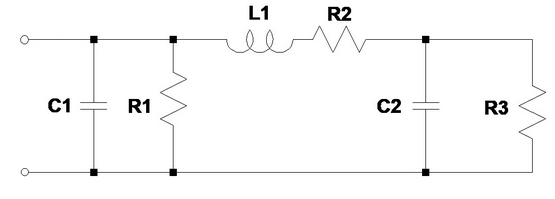

#### Una posible solución

Inicializamos la función requerida

In [ ]:
# Sea la siguiente función de excitación
ZZ = (s**2 + 1*s + 1) / (s**2 + 2*s + 5) / (s + 1)

print_subtitle('Impedancia $Z_{RLC}$ ')

print_latex(a_equal_b_latex_s('Z_{RLC}(s)', ZZ))

print_latex(a_equal_b_latex_s('Y_{RLC}(s)', 1/ZZ))


como se explicó en el anterior ejemplo, la topología circuital será la guía de las remociones. Como los primeros elementos están en derivación, así debemos proceder: removiendo un **polo en infinito** y un **valor constante**

In [ ]:
# remoción total en infinito de 1/ZZ

Y2, Yc1 = remover_polo_infinito(1/ZZ)

# Yc1 es la admitancia removida
# extraigo C1
C1 = Yc1/s

Al proceder a remover un valor constante, debe prestarse especial cuidado a **NO remover de más**. Es decir, solo se podrá remover el mínimo valor real de la función en ambos extremos:

In [ ]:
Ginf = sp.limit(Y2, s, sp.oo)
G0 = sp.limit(Y2, s, 0)

import numpy as np

# remuevo la menor admitancia
R1 = 1/np.min((Ginf, G0))
Y4 = sp.factor(sp.simplify(sp.expand(Y2 - 1/R1)))

print( 'La función Y4 es FRP? {:s}'.format(str_si_o_no[isFRP(Y4)]) )


Evidentemente lo hemos hecho bien. Procedemos ahora a continuar con la topología de la misma manera

In [ ]:
Z6, Zl1 = remover_polo_infinito(1/Y4)

# Zl1  es la impedancia removida
# extraigo L1
L1 = Zl1/s

# remuevo la menor resistencia
Rinf = sp.limit(Z6, s, sp.oo)
R0 = sp.limit(Z6, s, 0)
R2 = np.min((Rinf, R0))
Z8 = sp.factor(sp.simplify(sp.expand(Z6 - R2)))

print( 'La función Z8 es FRP? {:s}'.format(str_si_o_no[isFRP(Z8)]) )

Ahora si, procedemos a los elementos finales

In [ ]:
# extraigo C2
C2 = sp.limit(1/s/Z8, s, sp.oo)

Y10, Yc2 = remover_polo_infinito(1/Z8)
# Yc1 es la admitancia removida
# extraigo C1
C2 = Yc2/s

R3 = 1/Y10

Finalmente, dibujamos la red resultante con los valores obtenidos

In [ ]:
# Dibujamos la red resultante:

d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          ZZ, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_derivacion(d, Capacitor, C1)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, R1)
    
d = dibujar_elemento_serie(d, Inductor, L1)

d = dibujar_elemento_serie(d, Resistor, R2)

d = dibujar_elemento_derivacion(d, Capacitor, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, R3)

display(d)

Con este ejemplo se finaliza el documento.